# Test for data engineer - Resolve Studio


## Target
- Find patterns of employee absenteeism in a courier company

## Explain data

### Reason absences (CID) **International Code of Diseases**
1. Certain infectious and parasitic diseases  
2. Neoplasms  
3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
4. Endocrine, nutritional and metabolic diseases  
5. Mental and behavioural disorders  
6. Diseases of the nervous system  
7. Diseases of the eye and adnexa  
8. Diseases of the ear and mastoid process  
9. Diseases of the circulatory system  
10. Diseases of the respiratory system  
11. Diseases of the digestive system  
12. Diseases of the skin and subcutaneous tissue  
13. Diseases of the musculoskeletal system and connective tissue  
14. Diseases of the genitourinary system  
15. Pregnancy, childbirth and the puerperium  
16. Certain conditions originating in the perinatal period  
17. Congenital malformations, deformations and chromosomal abnormalities  
18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
19. Injury, poisoning and certain other consequences of external causes  
20. External causes of morbidity and mortality  
21. Factors influencing health status and contact with health services.

### Categories without (CID)
22. patient follow-up
23. medical consultation
24. blood donation
25. laboratory examination
26. unjustified absence
27. physiotherapy
28. dental consultation

### Day of the week 
- Monday (2)
- Tuesday (3)
- Wednesday (4)
- Thursday (5)
- Friday (6)

### Seasons 
- summer (1)
- autumn (2)
- winter (3)
- spring (4)

### Transportation expense 
- In Dollars

### Distance from Residence to Work
- In kilometers

### Work load Average
- For day

### Disciplinary failure 
- yes = 1
- no = 0

### Education 
- high school (1)
- graduate (2)
- postgraduate (3)
- master and doctor (4)

### Son 
- (number of children)

### Social drinker 
- yes = 1
- no = 0

### Social smoker 
- yes=1 
- no=0

### Pet 
- (number of pet)

### Absenteeism time in hours (target)

## 1. Exploratory Data Analysis



In [5]:
import pandas as pd
import csv
import os

dir_url = os.getcwd()
file = "{}/Absenteeism_at_work_AAA/Absenteeism_at_work.csv".format(dir_url)
data = pd.read_csv(file, delimiter=";")
data_set = pd.DataFrame.from_dict(data)
data_set.describe().astype('int')

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740,740,740,740,740,740,740,740,740,740,...,740,740,740,740,740,740,740,740,740,740
mean,18,19,6,3,2,221,29,12,36,271,...,0,1,1,0,0,0,79,172,26,6
std,11,8,3,1,1,66,14,4,6,39,...,0,0,1,0,0,1,12,6,4,13
min,1,0,0,2,1,118,5,1,27,205,...,0,1,0,0,0,0,56,163,19,0
25%,9,13,3,3,2,179,16,9,31,244,...,0,1,0,0,0,0,69,169,24,2
50%,18,23,6,4,3,225,26,13,37,264,...,0,1,1,1,0,0,83,170,25,3
75%,28,26,9,5,4,260,50,16,40,294,...,0,1,2,1,0,1,89,172,31,8
max,36,28,12,6,4,388,52,29,58,378,...,1,4,4,1,1,8,108,196,38,120


#### First Report

1. The most used reasons for absence are:
    - Diseases of the musculoskeletal system and connective tissue
    - medical consultation
    - unjustified absence
2. The months when most are absent are:
    - March, June and September
3. The days when most are absent are:
    - Tuesday, Wednesday and friday
4. The seasons when most are absent are:
    - Autumn, winter and spring
5. The Distance from Residence to Work is between 16 to 50 km
6. The age of employees is between 30 to 40 approx
7. Most employees do not have disciplinary offenses
8. Most employees have education high school
9. Most employees have 1 to 2 sons
10. Most employees are social drinker
11. Most employees are not social smoker
12. Most employees have at least 1 pet
13. The majority of employees are obese
14. The Absenteeism time is between 2 to 8 hours

## 2. Perform Clustering Analysis

In [15]:
data_set.isnull().any().any()


False

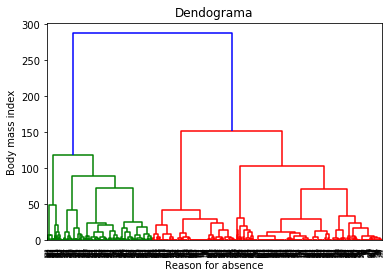

In [3]:
import scipy.cluster.hierarchy as sch

x = data_set.iloc[:, [1, 8]].values
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('Reason for absence')
plt.ylabel('Body mass index')
plt.show()


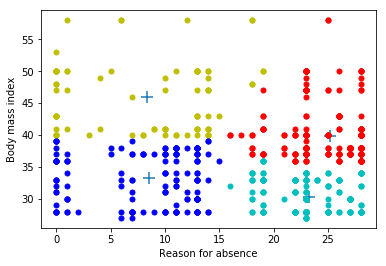

In [75]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as ptl
import numpy as np

x = data_set["Reason for absence"].values
y = data_set["Age"].values

X = np.array(list(zip(x, y)))
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

colors = ['b.', 'r.', 'c.', 'y.', 'm.']
for i in range(len(X)):
    ptl.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
    
ptl.xlabel('Reason for absence')
ptl.ylabel('Body mass index')
ptl.scatter(centroids[:,0], centroids[:,1], marker='+', s=150)
ptl.show()